# Homecourt Advantage

This notebook will examine the effect of homecourt advantage measured in both winning % and point differential, and how it changes over time. Homecourt advantage tends to vary by year and affects how a team's strength is evaluated. 

This notebook was created using the data from the [2018 March Madness Kaggle Competition](https://www.kaggle.com/c/mens-machine-learning-competition-2018). 

In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = 'C:\\Users\\ramir\\OneDrive\\Documents\\GitHub\\marchmadness\\DataFiles\\'
#path = "..\\input\\RegularSeasonCompactResults.csv"
df_rs = pd.read_csv(path+"RegularSeasonCompactResults.csv", usecols=['Season', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc'])
df_rs.head()


,Season,WTeamID,WScore,LTeamID,LScore,WLoc
0,1985,1228,81,1328,64,N
1,1985,1106,77,1354,70,H
2,1985,1112,63,1223,56,H
3,1985,1165,70,1432,54,H
4,1985,1192,86,1447,74,H


In [12]:
### Throw away neutral games

df_rs = df_rs[df_rs['WLoc']!='N']
df_rs['Diff'] = df_rs['WScore'] - df_rs['LScore']
df_rs.head()

,Season,WTeamID,WScore,LTeamID,LScore,WLoc,Diff
1,1985,1106,77,1354,70,H,7
2,1985,1112,63,1223,56,H,7
3,1985,1165,70,1432,54,H,16
4,1985,1192,86,1447,74,H,12
5,1985,1218,79,1337,78,H,1


## Homecourt Advantage in Wins

In [4]:
n_games = len(df_rs)
print(n_games)

135497


First let's look at the historical homecourt advantage by wins. 

In [48]:
home_mask = df_rs.WLoc=='H'
away_mask = df_rs.WLoc=='A'

home_wins = len(df_rs.loc[home_mask, 'WScore'])
away_wins = len(df_rs.loc[away_mask, 'WScore'])
print("Home Win-Loss: {}-{} (Winning %: {})".format(home_wins, away_wins, round(home_wins/(home_wins+away_wins),3)))

Home Win-Loss: 89564-45933 (Winning %: 0.661)


The home team wins roughly twice as much as the away team!

### Homecourt Wins Over Time

Next we're going to look at the home team's win percentage over time. 

In [8]:
games_by_season = df_rs[['Season','WLoc']].groupby('Season').agg('count').rename({'WLoc':'Games'},axis=1)
wins_by_season = df_rs[home_mask][['Season','WLoc']].groupby('Season').agg('count').rename({'WLoc':'Wins'}, axis=1)
df_home = pd.DataFrame(wins_by_season['Wins']/games_by_season['Games'], columns=['WinP']).reset_index()
df_home.head()

,Season,WinP
0,1985,0.668255
1,1986,0.672856
2,1987,0.658830
3,1988,0.666761
4,1989,0.659462


Text(0,0.5,'Win %')

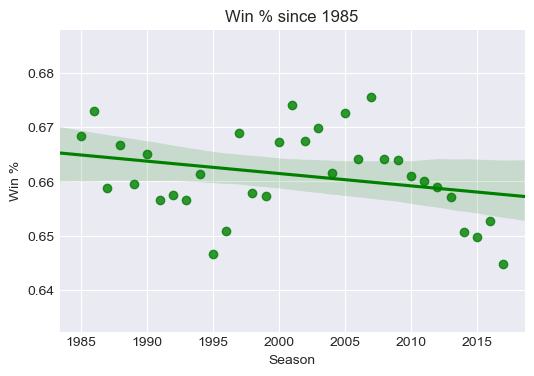

In [42]:
sns.regplot(x="Season",y='WinP',data=df_home, color='g', scatter='False')
sns.set_style("darkgrid")
#plt.plot(x=df_home['Season'], y=df_home['WinP'])
plt.title("Win % since 1985")
plt.ylabel("Win %")


From the plot, it appears that homecourt advantage is getting slightly weaker. Let's zoom into the last 10 years. 

Text(0.5,1,'Win % over last 10 years')

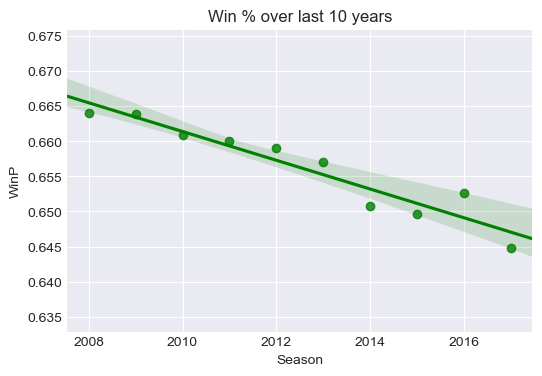

In [13]:
sns.regplot(x="Season",y='WinP',data=df_home.tail(10), color='g')
plt.title("Win % over last 10 years")

The trendline above is steeper over a shorter period of time, which suggests that homecourt advantage may not be as prominent now than it was before.

## Point Differential

Next we do the same steps but with point differential. 

In [14]:
df_rs.head()

,Season,WTeamID,WScore,LTeamID,LScore,WLoc,Diff
1,1985,1106,77,1354,70,H,7
2,1985,1112,63,1223,56,H,7
3,1985,1165,70,1432,54,H,16
4,1985,1192,86,1447,74,H,12
5,1985,1218,79,1337,78,H,1


In [45]:
print("Historical Average Homecourt Advantage (points):")
print(
((df_rs.loc[home_mask,'WScore'].sum() + df_rs.loc[away_mask,'LScore'].sum()) - #(Total home score - Total away score)/n_games 
 (df_rs.loc[home_mask,'LScore'].sum() + df_rs.loc[away_mask,'WScore'].sum())) / n_games)

Historical Average Homecourt Advantage (points):
5.80660088415


On average, the home team outscores the away team by 5.8 points. This is actually a large advantage. 

Based on my experience as a college basketball fan, I suspect that the discrepancy's size is partially because the smaller schools with worse programs are expected to travel more often against the bigger schools in the non-conference season. 

In [41]:
home_scores = df_rs.loc[home_mask, ['Season', 'WScore']].groupby('Season').agg('sum').values + df_rs.loc[away_mask, ['Season', 'LScore']].groupby('Season').agg('sum').values
away_scores = df_rs.loc[home_mask, ['Season', 'LScore']].groupby('Season').agg('sum').values + df_rs.loc[away_mask, ['Season', 'WScore']].groupby('Season').agg('sum').values
df_ptdiff = pd.DataFrame((home_scores-away_scores)/games_by_season)
df_ptdiff.rename({'Games':'PtDiff'}, axis=1, inplace=True)
df_ptdiff = df_ptdiff.reset_index()
df_home['PtDiff'] = df_ptdiff.PtDiff
df_home.head()

,Season,WinP,PtDiff
0,1985,0.668255,5.250744
1,1986,0.672856,5.473033
2,1987,0.658830,5.235092
3,1988,0.666761,6.094808
4,1989,0.659462,5.982821


Text(0,0.5,'Home team Point Differential')

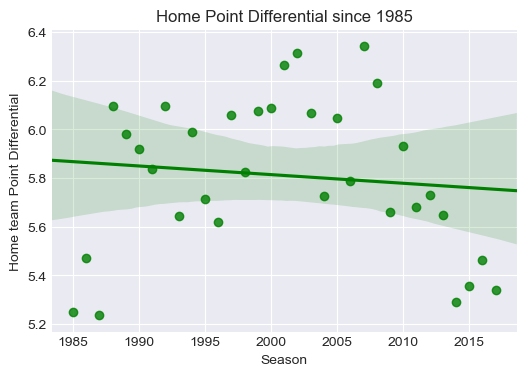

In [43]:
sns.regplot(x="Season",y='PtDiff',data=df_home, color='g', scatter='False')
sns.set_style("darkgrid")
#plt.plot(x=df_home['Season'], y=df_home['WinP'])
plt.title("Home Point Differential since 1985")
plt.ylabel("Home team point differential")


The trendline is flatter but that's likely due to the anomalies from the 1985-1987 seasons. Looking at the past 10 years shows a trend consistent with the downward trend in homecourt advantage above. 

Text(0,0.5,'Home team Point Differential')

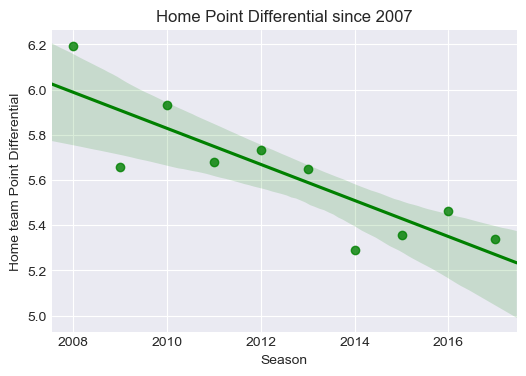

In [44]:
sns.regplot(x="Season",y='PtDiff',data=df_home.tail(10), color='g', scatter='False')
sns.set_style("darkgrid")
#plt.plot(x=df_home['Season'], y=df_home['WinP'])
plt.title("Home Point Differential since 2007")
plt.ylabel("Home team point differential")
